# **FIFA 2023:Data-Driven Approach to Optimal Line-Up**

In [7]:
# !pip install chart-studio

In [82]:
!pip install --upgrade plotly

### Import Libraries

In [83]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

from plotly.offline import iplot, init_notebook_mode
from geopy.geocoders import Nominatim
from chart_studio import plotly as py

In [10]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [11]:
# Uploding the data

data = pd.read_csv('/content/male_players.csv')

## Data Cleaning

In [12]:
data.shape

(8334, 109)

In [13]:
data.dtypes


player_id         int64
player_url       object
fifa_version    float64
fifa_update     float64
update_as_of     object
                 ...   
lcb              object
cb               object
rcb              object
rb               object
gk               object
Length: 109, dtype: object

In [14]:
# split the player position into two column

data[['position', 'best position']] = data['player_positions'].str.split(', ', n=1, expand=True)
data['best position'].fillna(data['position'], inplace=True)

In [15]:
data

,player_id,player_url,fifa_version,fifa_update,update_as_of,short_name,long_name,player_positions,overall,potential,...,rdm,rwb,lb,lcb,cb,rcb,rb,gk,position,best position
0,2,https://sofifa.com/player/2/giovanni-pasquale/...,15.0,2.0,2014-09-18,G. Pasquale,Giovanni Pasquale,LM,68,68,...,69-1,71-3,72-4,70-2,70-2,70-2,72-4,13,LM,LM
1,11,https://sofifa.com/player/11/romain-rocchi/150002,15.0,2.0,2014-09-18,R. Rocchi,Romain Rocchi,"CM, CDM",68,68,...,65,62,60,62,62,62,60,12,CM,CDM
2,27,https://sofifa.com/player/27/joe-cole/150002,15.0,2.0,2014-09-18,J. Cole,Joe Cole,"RM, CAM",74,74,...,59,56,50,48,48,48,50,12,RM,CAM
3,28,https://sofifa.com/player/28/manuel-herrera-ya...,15.0,2.0,2014-09-18,Manu Herrera,Manuel Herrera Yagüe,GK,76,76,...,32,31,31,34,34,34,31,76,GK,GK
4,41,https://sofifa.com/player/41/andres-iniesta-lu...,15.0,2.0,2014-09-18,Iniesta,Andrés Iniesta Luján,"CM, LW",89,89,...,77+3,76+3,70+3,63+3,63+3,63+3,70+3,14+3,CM,LW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8329,201927,https://sofifa.com/player/201927/callum-harrio...,15.0,2.0,2014-09-18,C. Harriott,Callum Kyle Harriott,LM,60,72,...,43,45,40,37,37,37,40,14,LM,LM
8330,201931,https://sofifa.com/player/201931/gabriel-vasco...,15.0,2.0,2014-09-18,Gabriel,Gabriel Vasconelos Ferreira,GK,71,78,...,30,29,28,32,32,32,28,71,GK,GK
8331,201936,https://sofifa.com/player/201936/jin-hyeon-kim...,15.0,2.0,2014-09-18,Kim Jin Hyeon,김진현 金镇铉,GK,67,72,...,28,31,30,29,29,29,30,67,GK,GK
8332,201937,https://sofifa.com/player/201937/sven-dhoest/1...,15.0,2.0,2014-09-18,S. Dhoest,Sven Dhoest,GK,62,74,...,33,30,29,32,32,32,29,62,GK,GK


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8334 entries, 0 to 8333
Columns: 111 entries, player_id to best position
dtypes: float64(20), int64(43), object(48)
memory usage: 7.1+ MB


In [17]:
data.isna().sum()

player_id        0
player_url       0
fifa_version     0
fifa_update      0
update_as_of     0
                ..
rcb              1
rb               1
gk               1
position         0
best position    0
Length: 111, dtype: int64

In [18]:
data.duplicated().sum()

0

In [19]:
copy=data.copy()

In [20]:
copy.drop_duplicates(inplace=True)

# Data Exploration

### Top rated countries and clubs

Feautures:

* Teams (Nationality and Club Name)
* Ratings (Overall and Potential)
* Positions (Positions Played and Best position)

In [21]:
data.head(3)

,player_id,player_url,fifa_version,fifa_update,update_as_of,short_name,long_name,player_positions,overall,potential,...,rdm,rwb,lb,lcb,cb,rcb,rb,gk,position,best position
0,2,https://sofifa.com/player/2/giovanni-pasquale/...,15.0,2.0,2014-09-18,G. Pasquale,Giovanni Pasquale,LM,68,68,...,69-1,71-3,72-4,70-2,70-2,70-2,72-4,13,LM,LM
1,11,https://sofifa.com/player/11/romain-rocchi/150002,15.0,2.0,2014-09-18,R. Rocchi,Romain Rocchi,"CM, CDM",68,68,...,65,62,60,62,62,62,60,12,CM,CDM
2,27,https://sofifa.com/player/27/joe-cole/150002,15.0,2.0,2014-09-18,J. Cole,Joe Cole,"RM, CAM",74,74,...,59,56,50,48,48,48,50,12,RM,CAM


In [22]:
#  Extracting the columns we have to use form dataframe

fifa24 = data[[
    'long_name',
    'age',
    'nationality_name',
    'overall',
    'potential',
    'club_name',
    'player_positions',
    'position',
    'value_eur',
    'wage_eur'

]]

In [23]:
fifa24.head(3)

,long_name,age,nationality_name,overall,potential,club_name,player_positions,position,value_eur,wage_eur
0,Giovanni Pasquale,32,Italy,68,68,Udinese,LM,LM,675000.0,9000.0
1,Romain Rocchi,32,France,68,68,Metz,"CM, CDM",CM,675000.0,8000.0
2,Joe Cole,32,England,74,74,Aston Villa,"RM, CAM",RM,2400000.0,35000.0


In [24]:
# Renaming the columns name

fifa24.rename(columns={'long_name': 'name',
                       'nationality_name': 'nationality',
                       'club_name': 'club',
                       'player_positions': 'positions',
                       'position': 'best_position',
                       'value_eur': 'valueEUR',
                       'wage_eur': 'salary'
                       }, inplace=True)

<ipython-input-24-38ae33ac4fd0>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [25]:
fifa24.head(3)

,name,age,nationality,overall,potential,club,positions,best_position,valueEUR,salary
0,Giovanni Pasquale,32,Italy,68,68,Udinese,LM,LM,675000.0,9000.0
1,Romain Rocchi,32,France,68,68,Metz,"CM, CDM",CM,675000.0,8000.0
2,Joe Cole,32,England,74,74,Aston Villa,"RM, CAM",RM,2400000.0,35000.0


In [26]:
fifa24.isnull().sum()

name               0
age                0
nationality        0
overall            0
potential          0
club             106
positions          0
best_position      0
valueEUR         173
salary           106
dtype: int64

In [27]:
fifa24.isna().sum()

name               0
age                0
nationality        0
overall            0
potential          0
club             106
positions          0
best_position      0
valueEUR         173
salary           106
dtype: int64

## Univariate Exploration

In [28]:
def x_y_t(xaxis, yaxis, title):
    #this function contains graph titles
    plt.xlabel(xaxis)
    plt.ylabel(yaxis)
    plt.title(title)

### Potential rating

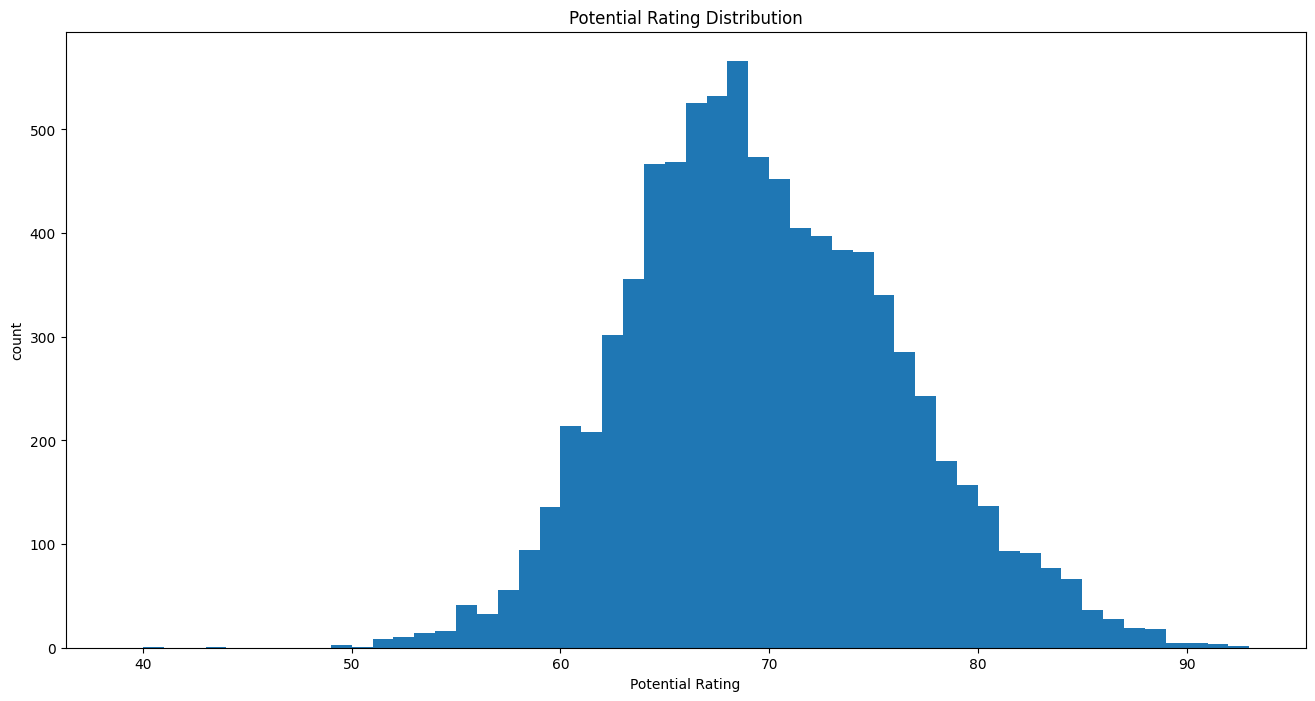

In [29]:
#Potential rating
plt.figure(figsize=(16,8))

bins = np.arange(fifa24['potential'].min()-1, fifa24['potential'].max()-1, 1)
plt.hist(data = fifa24, x = 'potential', bins=bins);
sb.set_style("whitegrid")
x_y_t('Potential Rating', 'count', 'Potential Rating Distribution')

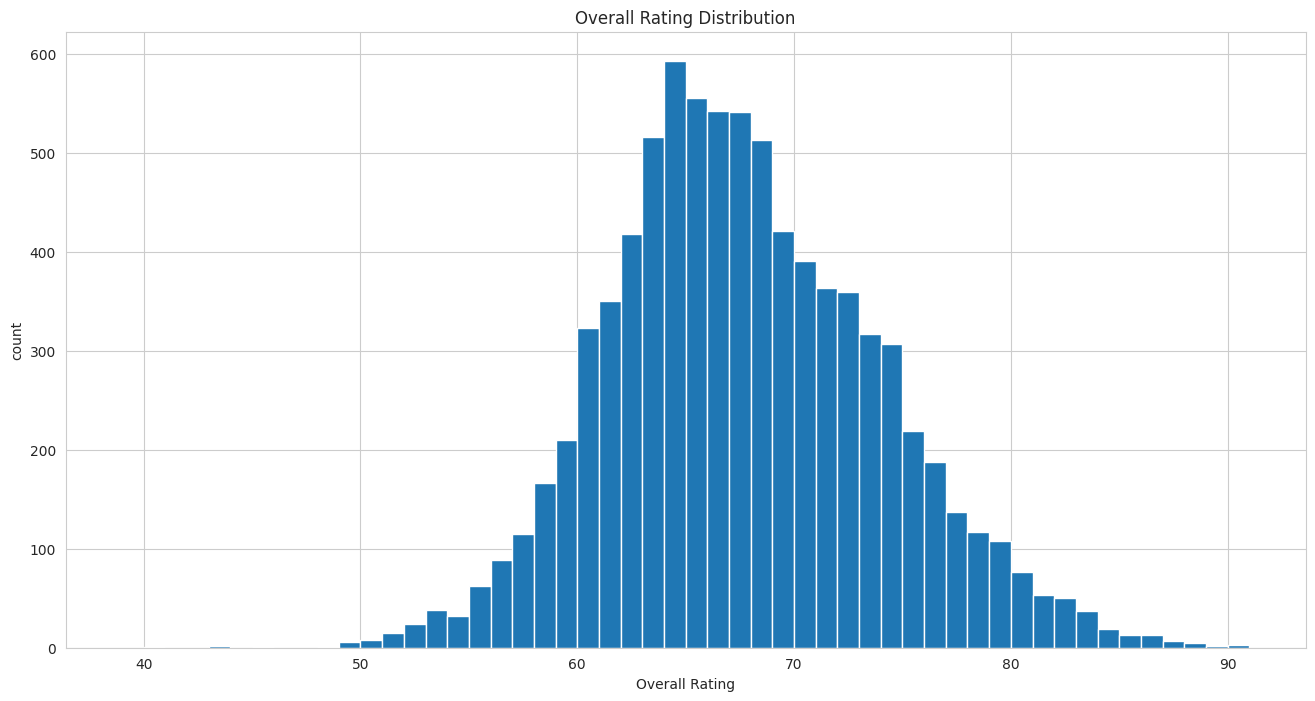

In [30]:
#overall
plt.figure(figsize=(16,8))

bins = np.arange(fifa24['overall'].min()-1, fifa24['overall'].max()-1, 1)
plt.hist(data = fifa24, x = 'overall', bins=bins);
sb.set_style("whitegrid")
x_y_t('Overall Rating', 'count', 'Overall Rating Distribution')

In [31]:
fifa24['best_position']

0       LM
1       CM
2       RM
3       GK
4       CM
        ..
8329    LM
8330    GK
8331    GK
8332    GK
8333    RB
Name: best_position, Length: 8334, dtype: object

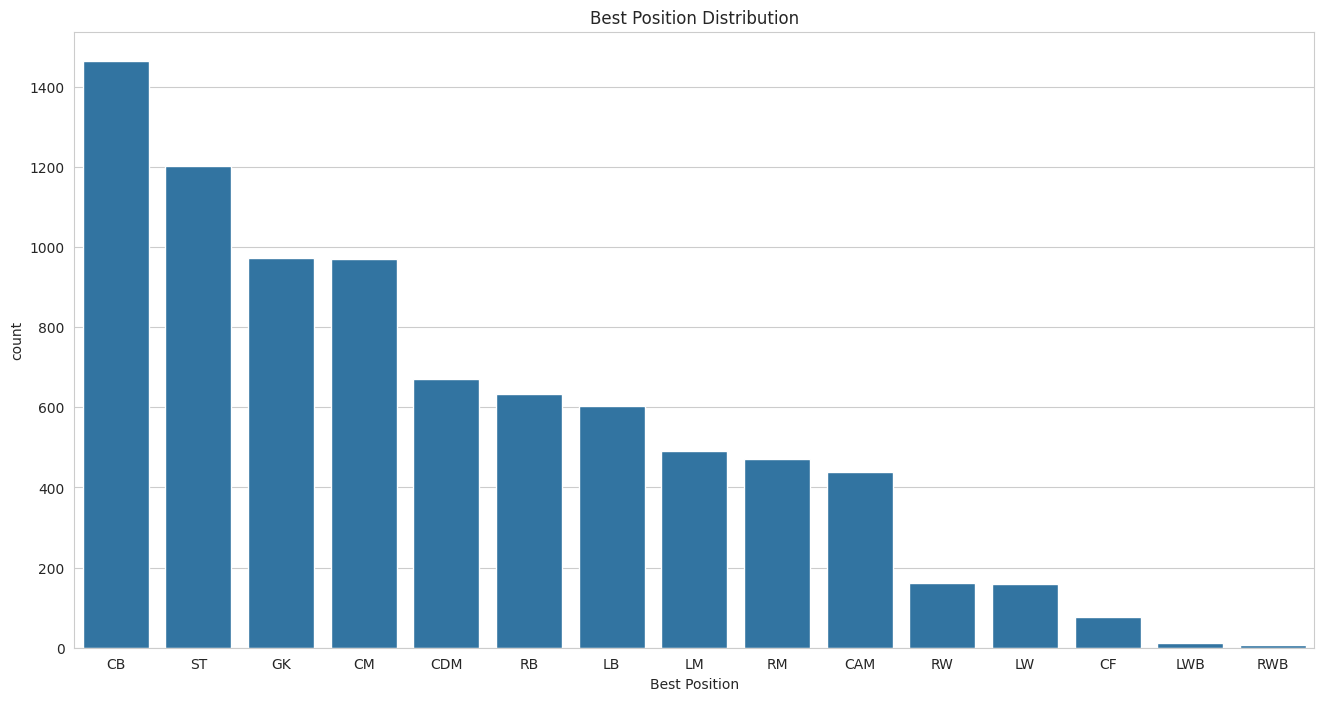

In [32]:
#Best Position
plt.figure(figsize=(16,8))
default_color = sb.color_palette()[0]
sb.countplot(data = fifa24,  x = 'best_position' ,color = default_color, order = fifa24['best_position'].value_counts().index)
x_y_t('Best Position', 'count', 'Best Position Distribution')
plt.show()

* Clearly the ratings(Overall and Potential) follow a unimodal normal distribution. The Potential rating peaked about 69 while the Overall peaked around 65.
* A large percentage of the players are central backs (CB).
* Players are very centralized in Europe. To be precise, England, Germany, Spain, and France.

In [33]:
# Nationality

# Grouping the data by countries

nation = fifa24.groupby("nationality").size().reset_index(name="count")

In [34]:
nation

,nationality,count
0,Albania,20
1,Algeria,25
2,Angola,3
3,Antigua and Barbuda,2
4,Argentina,330
...,...,...
134,Uzbekistan,5
135,Venezuela,18
136,Wales,71
137,Zambia,2


In [95]:
# Grouping the data by countries
valcon = fifa24.groupby("nationality").size().reset_index(name="count")

# Plotting the choropleth map
init_notebook_mode(connected=True)
plotmap = [ dict(
        type = 'choropleth',
        locations = valcon["nationality"],
        locationmode = 'country names',
        z = valcon["count"],
        text = valcon["nationality"],
        autocolorscale = True,
        reversescale = False,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            title = "Amount of Players"),
      ) ]

layout = dict(
    title = "Nationalities of FIFA 24 Players",
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection = dict(
            type = 'aitoff'
        )
    )
)

fig = dict( data=plotmap, layout=layout )
iplot(fig)


In [94]:
valcon['count'].isnull().sum()

0

In [37]:
fifa24["nationality"].value_counts().head(25)

England                941
Spain                  611
France                 520
Italy                  440
Germany                380
Argentina              330
Republic of Ireland    286
Mexico                 280
Brazil                 269
Poland                 206
Netherlands            201
Sweden                 197
Turkey                 190
Scotland               189
Portugal               181
Norway                 180
Denmark                173
United States          172
Belgium                166
Russia                 149
Korea Republic         147
Austria                138
Switzerland            127
Australia              118
Colombia                96
Name: nationality, dtype: int64

## Bivariate Exploration

In [38]:
country20 = fifa24[['nationality', 'name', 'overall', 'potential']].groupby('nationality').head(20).reset_index(drop=True)

country20 = country20.groupby('nationality').mean()[['overall', 'potential']].sort_values(by=['overall', 'potential'],ascending=False)[:10].reset_index()

<ipython-input-38-e1406565491c>:3: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [39]:
club20=fifa24[['club', 'name', 'overall', 'potential']].groupby('club').head(20).reset_index(drop=True)

club20=club20.groupby('club').mean()[['overall', 'potential']].sort_values(by=['overall', 'potential'], ascending=False)[:10].reset_index()

<ipython-input-39-90ff33d16c5a>:3: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [40]:
# Average rating per country for top 20 rated players

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]//2, y[i], ha = 'center')

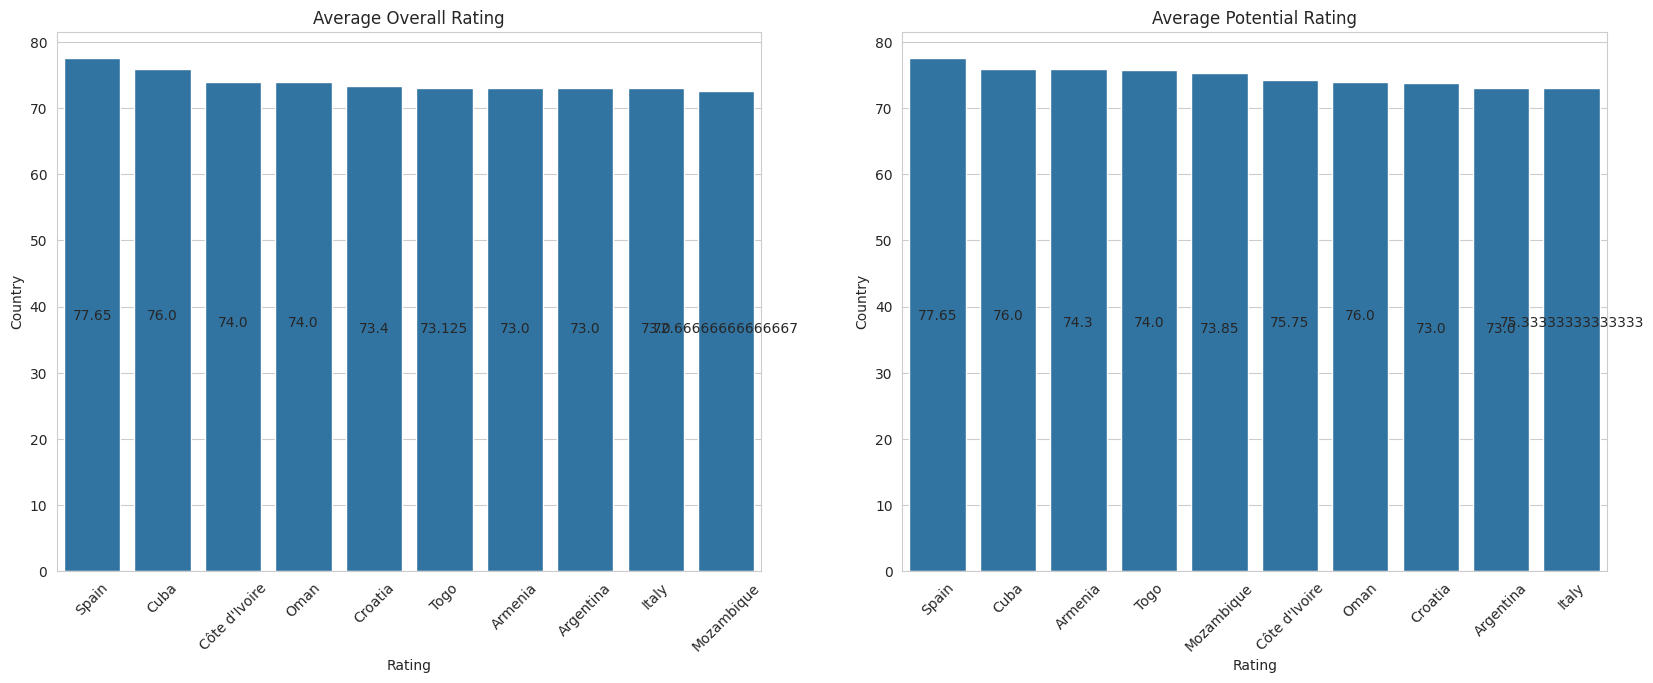

In [41]:
plt.figure(figsize = [20, 7])


#Average country overall rating

plt.subplot(1, 2, 1)
default_color = sb.color_palette()[0]
sb.barplot(data = country20[:20], y='overall', x='nationality', color = default_color);
plt.xticks(rotation=45)
addlabels(country20['nationality'],country20['overall'])
x_y_t('Rating','Country',"Average Overall Rating")

#Average country potential rating

plt.subplot(1, 2, 2)
default_color = sb.color_palette()[0]
sb.barplot(data = country20.sort_values(by=['potential'], ascending=False), y='potential', x='nationality', color = default_color);
plt.xticks(rotation=45)
addlabels(country20['nationality'],country20['potential'])
x_y_t('Rating','Country',"Average Potential Rating")

plt.show()

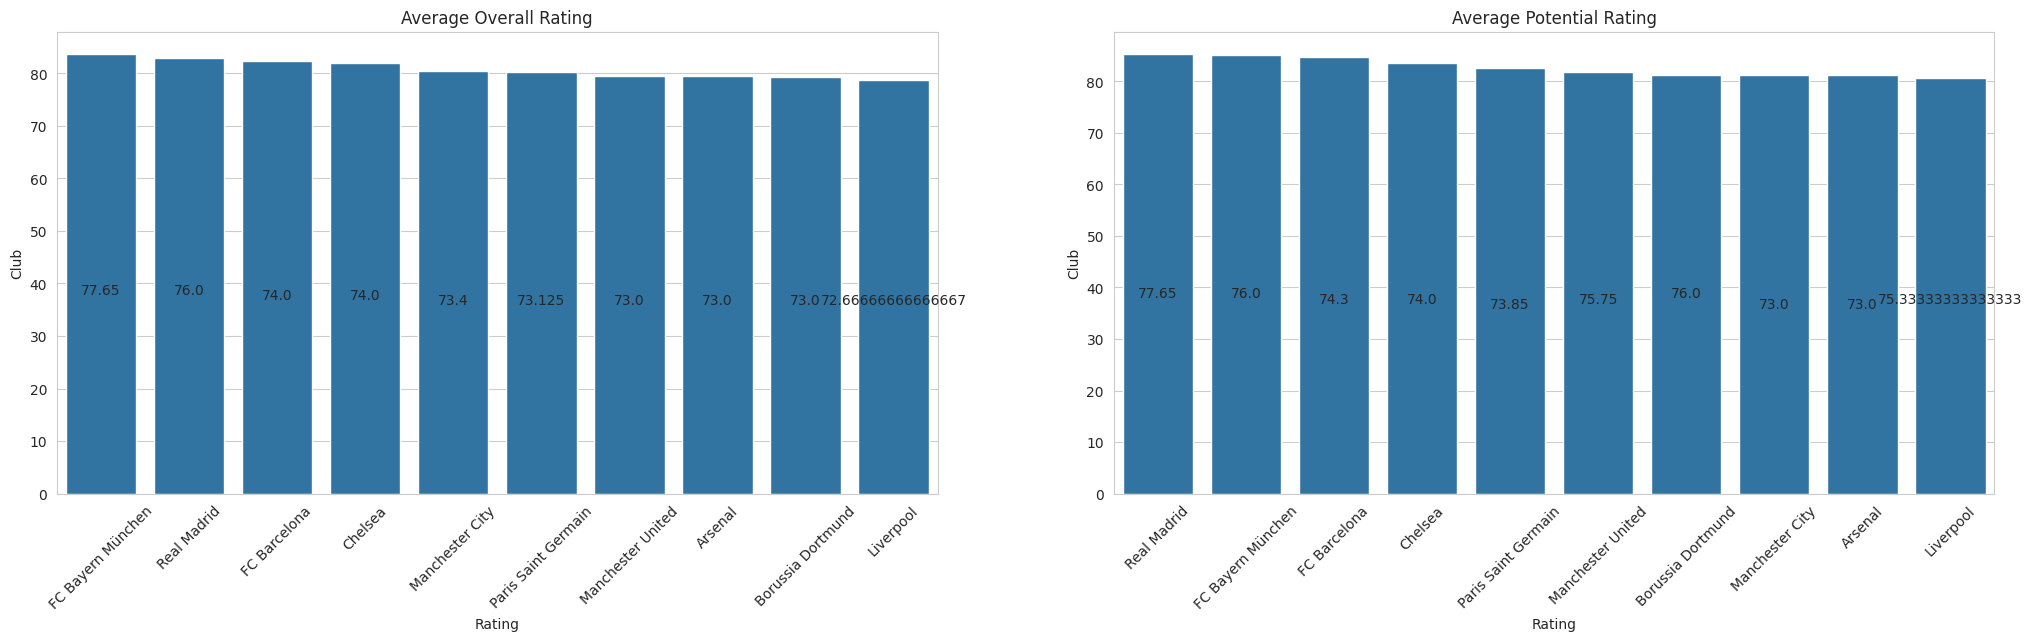

In [42]:
# Average rating per club for top 20 rated players

plt.figure(figsize = [25, 6])


#Average overall rating

plt.subplot(1, 2, 1)
default_color = sb.color_palette()[0]
sb.barplot(data = club20[:20], y='overall', x='club', color = default_color);
plt.xticks(rotation=45)
addlabels(club20['club'],country20['overall'])
x_y_t('Rating','Club',"Average Overall Rating")

#Average potential rating
plt.subplot(1, 2, 2)
default_color = sb.color_palette()[0]
sb.barplot(data = club20.sort_values(by=['potential'], ascending=False), y='potential', x='club', color = default_color);
plt.xticks(rotation=45)
addlabels(club20['club'],country20['potential'])
x_y_t('Rating','Club',"Average Potential Rating")

plt.show()

find out the optimal formation for the clubs and country based on the ratings

## Optimal Squad Analysis

In [43]:
fifa24 = fifa24[['name', 'age', 'nationality', 'overall', 'potential', 'club','positions', 'best_position', 'valueEUR', 'salary']]
fifa24.head(10)

,name,age,nationality,overall,potential,club,positions,best_position,valueEUR,salary
0,Giovanni Pasquale,32,Italy,68,68,Udinese,LM,LM,675000.0,9000.0
1,Romain Rocchi,32,France,68,68,Metz,"CM, CDM",CM,675000.0,8000.0
2,Joe Cole,32,England,74,74,Aston Villa,"RM, CAM",RM,2400000.0,35000.0
3,Manuel Herrera Yagüe,32,Spain,76,76,Elche,GK,GK,4300000.0,45000.0
4,Andrés Iniesta Luján,30,Spain,89,89,FC Barcelona,"CM, LW",CM,36000000.0,250000.0
5,Mladen Kašćelan,31,Montenegro,63,63,Arsenal Tula,"CDM, RB",CDM,190000.0,2000.0
6,Guy Roland Demel,33,Côte d'Ivoire,70,70,West Ham United,RB,RB,700000.0,15000.0
7,Emre Belözoğlu,33,Turkey,78,78,Fenerbahçe,"CM, CAM",CM,4400000.0,70000.0
8,Giampiero Pinzi,33,Italy,74,74,Udinese,"CDM, CM",CDM,1300000.0,25000.0
9,Robbie Keane,33,Republic of Ireland,79,79,LA Galaxy,"ST, CF",ST,5000000.0,80000.0


In [44]:
fifa24.isnull().sum()

name               0
age                0
nationality        0
overall            0
potential          0
club             106
positions          0
best_position      0
valueEUR         173
salary           106
dtype: int64

### Optimal Squad based on overall rating

**What's the optimal squad according to FIFA 24 purely based on overall rating?**

### 4-3-3 Formation

In [45]:
def get_best_squad433(formation, fifa24):
    squad = []

    for position in formation:
        # Filter players for the current position
        position_data = fifa24[fifa24['best_position'] == position]

        # Find the player with the highest overall rating for the position
        best_player = position_data.loc[position_data['overall'].idxmax()]

        squad.append([
            position,
            best_player['name'],
            best_player['overall'],
            best_player['age'],
            best_player['club'],
            best_player['valueEUR'],
            best_player['salary']
        ])

    squad_df = pd.DataFrame(squad, columns=['best_position', 'name', 'overall', 'age', 'club', 'valueEUR', 'salary'])

    return squad_df

# Example usage
squad_433 = ['GK', 'RB', 'CB', 'CB', 'LB', 'CDM', 'CM', 'CAM', 'RW', 'ST', 'LW']
best_squad = get_best_squad433(squad_433, fifa24)  # Replace 'fifa24' with your player data DataFrame

# Convert the DataFrame to a string for printing
squad_str = best_squad.to_string(index=False)
print(squad_str)

best_position                                name  overall  age                club   valueEUR   salary
           GK                  Manuel Peter Neuer       90   28   FC Bayern München 63500000.0 300000.0
           RB               Daniel Alves da Silva       83   31        FC Barcelona 10000000.0 140000.0
           CB                 Sergio Ramos García       87   28         Real Madrid 31500000.0 220000.0
           CB                 Sergio Ramos García       87   28         Real Madrid 31500000.0 220000.0
           LB                     Leighton Baines       82   29             Everton 12500000.0  90000.0
          CDM                        Philipp Lahm       87   30   FC Bayern München 24500000.0 190000.0
           CM                Andrés Iniesta Luján       89   30        FC Barcelona 36000000.0 250000.0
          CAM                          Mesut Özil       86   25             Arsenal 44000000.0 190000.0
           RW    Alexis Alejandro Sánchez Sánchez       84   25 

In [46]:
def get_best_squad422(formation, fifa24):
    squad = []

    for position in formation:
        # Filter players for the current position
        position_data = fifa24[fifa24['best_position'] == position]

        # Find the player with the highest overall rating for the position
        best_player = position_data.loc[position_data['overall'].idxmax()]

        squad.append([
            position,
            best_player['name'],
            best_player['overall'],
            best_player['age'],
            best_player['club'],
            best_player['valueEUR'],
            best_player['salary']
        ])

    squad_df = pd.DataFrame(squad, columns=['best_position', 'player', 'overall', 'age', 'club', 'valueEUR', 'salary'])

    return squad_df

# 4-2-2 Formation
squad_4222 = ['GK', 'RB', 'CB', 'CB', 'LB', 'CM', 'CM', 'RM', 'LM', 'ST', 'ST']

# Example usage with the 4-2-2 formation
best_squad = get_best_squad422(squad_4222, fifa24)

# Convert the DataFrame to a string for printing
squad_str = best_squad.to_string(index=False)
print(squad_str)

best_position                player  overall  age                club   valueEUR   salary
           GK    Manuel Peter Neuer       90   28   FC Bayern München 63500000.0 300000.0
           RB Daniel Alves da Silva       83   31        FC Barcelona 10000000.0 140000.0
           CB   Sergio Ramos García       87   28         Real Madrid 31500000.0 220000.0
           CB   Sergio Ramos García       87   28         Real Madrid 31500000.0 220000.0
           LB       Leighton Baines       82   29             Everton 12500000.0  90000.0
           CM  Andrés Iniesta Luján       89   30        FC Barcelona 36000000.0 250000.0
           CM  Andrés Iniesta Luján       89   30        FC Barcelona 36000000.0 250000.0
           RM          Arjen Robben       90   30   FC Bayern München 54500000.0 275000.0
           LM   Franck Bilal Ribéry       88   31   FC Bayern München 33000000.0 200000.0
           ST    Zlatan Ibrahimović       90   32 Paris Saint Germain 52500000.0 275000.0
          

In [47]:
def get_best_squad4231(formation, fifa24):
    squad = []

    for position in formation:
        # Filter players for the current position
        position_data = fifa24[fifa24['best_position'] == position]

        # Find the player with the highest overall rating for the position
        best_player = position_data.loc[position_data['overall'].idxmax()]

        squad.append([
            position,
            best_player['name'],
            best_player['overall'],
            best_player['age'],
            best_player['club'],
            best_player['valueEUR'],
            best_player['salary']
        ])

    squad_df = pd.DataFrame(squad, columns=['best_position', 'player', 'overall', 'age', 'club', 'valueEUR', 'salary'])

    return squad_df

# 4-2-3-1 Formation
squad_4231 = ['GK', 'RB', 'CB', 'CB', 'LB', 'CDM', 'CDM', 'CAM', 'RM', 'LM', 'ST']

# Example usage with the 4-2-3-1 formation
best_squad = get_best_squad4231(squad_4231, fifa24)

# Convert the DataFrame to a string for printing
squad_str = best_squad.to_string(index=False)
print(squad_str)







best_position                player  overall  age                club   valueEUR   salary
           GK    Manuel Peter Neuer       90   28   FC Bayern München 63500000.0 300000.0
           RB Daniel Alves da Silva       83   31        FC Barcelona 10000000.0 140000.0
           CB   Sergio Ramos García       87   28         Real Madrid 31500000.0 220000.0
           CB   Sergio Ramos García       87   28         Real Madrid 31500000.0 220000.0
           LB       Leighton Baines       82   29             Everton 12500000.0  90000.0
          CDM          Philipp Lahm       87   30   FC Bayern München 24500000.0 190000.0
          CDM          Philipp Lahm       87   30   FC Bayern München 24500000.0 190000.0
          CAM            Mesut Özil       86   25             Arsenal 44000000.0 190000.0
           RM          Arjen Robben       90   30   FC Bayern München 54500000.0 275000.0
           LM   Franck Bilal Ribéry       88   31   FC Bayern München 33000000.0 200000.0
          

## Optimal Country Squad Analysis

In [48]:
def get_best_squad_n(formation, nationality, measurement='overall'):
    # Create a copy of the fifa24 dataset
    fifa24_copy = fifa24.copy()

    # Filter the dataset by nationality
    fifa24_copy = fifa24_copy[fifa24_copy['nationality'] == nationality]

    # Create a list to store the squad information
    squad = []

    for position in formation:
        # Filter players for the current position
        position_data = fifa24_copy[fifa24_copy['best_position'].str.contains(position)]

        # Find the player with the highest measurement (e.g., 'Overall') for the position
        best_player = position_data[position_data[measurement] == position_data[measurement].max()].iloc[0]

        # Append player information to the squad list
        squad.append([
            best_player['best_position'],
            best_player['name'],
            best_player[measurement],
            best_player['age'],
            best_player['club'],
            best_player['valueEUR'],
            best_player['salary']
        ])

        # Remove the selected player from the dataset
        fifa24_copy = fifa24_copy.drop(best_player.name)

    # Calculate the average measurement for the squad
    avg_measurement = round(pd.to_numeric([x[2] for x in squad]).mean(), 2)

    # Create a DataFrame for the squad
    squad_df = pd.DataFrame(squad, columns=['best_position', 'name', measurement, 'age', 'club', 'valueEUR', 'salary'])

    return avg_measurement, squad_df


In [49]:
def get_summary_n(squad_list, squad_name, nationality_list):
    summary = []

    for i in nationality_list:
        count = 0
        for j in squad_list:

            # for overall rating
            O_temp_rating, _  = get_best_squad_n(formation = j, nationality = i, measurement = 'overall')

            # for potential rating & corresponding value
            P_temp_rating, _ = get_best_squad_n(formation = j, nationality = i, measurement = 'potential')

            summary.append([i, squad_name[count], O_temp_rating.round(2), P_temp_rating.round(2)])
            count += 1

    return summary

In [50]:
# formation

squad_352_strict = ['GK', 'CB', 'CB', 'CB', 'RB|RWB', 'CM|CDM', 'CAM', 'CM|CDM', 'LB|LWB', 'ST|CF', 'ST|CF']
squad_343_strict = ['GK', 'CB', 'CB', 'CB', 'RB|RWB', 'CM|CDM', 'CM|CDM', 'LB|LWB', 'RM|RW', 'ST|CF', 'LM|LW']
squad_442_strict = ['GK', 'RB|RWB', 'CB', 'CB', 'LB|LWB', 'RM|RW', 'CM|CDM', 'CM|CAM', 'LM|LW', 'ST|CF', 'ST|CF']
squad_4312_strict = ['GK', 'RB|RWB', 'CB', 'CB', 'LB|LWB', 'CM|CDM', 'CM|CDM', 'CM|CDM', 'CAM', 'ST|CF', 'ST|CF']
squad_433_strict = ['GK', 'RB|RWB', 'CB', 'CB', 'LB|LWB', 'CM|CDM', 'CM|CAM|CDM', 'CM|CAM|CDM', 'RM|RW', 'ST|CF', 'LM|LW']
squad_4231_strict = ['GK', 'RB|RWB', 'CB', 'CB', 'LB|LWB', 'CM|CDM', 'CM|CDM', 'RM|RW', 'CAM', 'LM|LW', 'ST|CF']

squad_list = [squad_352_strict, squad_343_strict, squad_442_strict, squad_4312_strict, squad_433_strict, squad_4231_strict]
squad_name = ['3-5-2', '3-4-3', '4-4-2', '4-3-1-2', '4-3-3', '4-2-3-1']

In [51]:
# france

France = pd.DataFrame(np.array(get_summary_n(squad_list, squad_name, ['France'])).reshape(-1,4), columns = ['nationality', 'squad', 'overall', 'potential'])
France.set_index('nationality', inplace = True)
France[['overall', 'potential']] = France[['overall', 'potential']].astype(float)

print (France)

               squad  overall  potential
nationality                             
France         3-5-2    81.82      85.27
France         3-4-3    82.36      85.45
France         4-4-2    82.27      85.55
France       4-3-1-2    82.00      85.36
France         4-3-3    82.55      85.64
France       4-2-3-1    82.36      85.64


So we can say that France has the best squard as 4-4-2 for the current and 4-3-1-2 for the future squad based on team ratings. Let's check out the best 11 squad line-up of France based on the formations.

In [52]:
rating_442_FR_Overall, best_list_442_FR_Overall = get_best_squad_n(squad_442_strict, 'France', 'overall')
print('-Overall-')
print('Average rating: {:.1f}'.format(rating_442_FR_Overall))
print(best_list_442_FR_Overall)

-Overall-
Average rating: 82.3
   best_position                           name  overall  age  \
0             GK                    Hugo Lloris       85   27   
1             RB                Mathieu Debuchy       80   28   
2             CB              Laurent Koscielny       81   28   
3             CB                  Mamadou Sakho       81   24   
4             LB                   Patrice Evra       80   33   
5             RW      Jonathan Ludovic Biabiany       79   26   
6            CDM                Jérémy Toulalan       83   30   
7             CM                     Paul Pogba       83   21   
8             LM            Franck Bilal Ribéry       88   31   
9             ST                  Karim Benzema       85   26   
10            ST  Loïc Alex Teliére Hubert Rémy       80   27   

                 club    valueEUR    salary  
0   Tottenham Hotspur  21000000.0  160000.0  
1             Arsenal   9500000.0  110000.0  
2             Arsenal   9500000.0  120000.0  
3   

In [53]:
rating_4312_FR_Potential, best_list_4312_FR_Potential = get_best_squad_n(squad_4312_strict, 'France', 'potential')
print('-Potential-')
print('Average rating: {:.1f}'.format(rating_4312_FR_Potential))
print(best_list_4312_FR_Potential)

-Potential-
Average rating: 85.4
   best_position                 name  potential  age                 club  \
0             GK          Hugo Lloris         86   27    Tottenham Hotspur   
1             RB      Mathieu Debuchy         80   28              Arsenal   
2             CB       Raphaël Varane         88   21          Real Madrid   
3             CB     Eliaquim Mangala         86   23      Manchester City   
4             LB       Layvin Kurzawa         85   21               Monaco   
5             CM           Paul Pogba         89   21             Juventus   
6            CDM       Blaise Matuidi         85   27  Paris Saint Germain   
7            CDM  Morgan Schneiderlin         84   24          Southampton   
8            CAM      Clément Grenier         85   23   Olympique Lyonnais   
9             ST        Karim Benzema         87   26          Real Madrid   
10            ST  Alexandre Lacazette         84   23   Olympique Lyonnais   

      valueEUR    salary  
0  

In [54]:
# germany

Germany = pd.DataFrame(np.array(get_summary_n(squad_list, squad_name, ['Germany'])).reshape(-1,4), columns = ['nationality', 'squad', 'overall', 'potential'])
Germany.set_index('nationality', inplace = True)
Germany[['overall', 'potential']] = Germany[['overall', 'potential']].astype(float)

print (Germany)

               squad  overall  potential
nationality                             
Germany        3-5-2    83.91      85.55
Germany        3-4-3    84.36      85.82
Germany        4-4-2    84.09      85.82
Germany      4-3-1-2    84.09      85.73
Germany        4-3-3    84.64      86.36
Germany      4-2-3-1    84.64      86.36


Germany's current ratings peak with either 4-2-3-1 or 4-3-3 formation; while 4-3-1-2 are their best options for the future. With that, I'll show Germany's best 11 squad with 4-2-3-1 for current ratings and 4-3-1-2 for potential ratings.

In [55]:
rating_4231_GER_Overall, best_list_4231_GER_Overall = get_best_squad_n(squad_4231_strict, 'Germany', 'overall')
print('-Overall-')
print('Average rating: {:.1f}'.format(rating_4231_GER_Overall))
print(best_list_4231_GER_Overall)

-Overall-
Average rating: 84.6
   best_position                    name  overall  age               club  \
0             GK      Manuel Peter Neuer       90   28  FC Bayern München   
1             RB        Kevin Großkreutz       77   25  Borussia Dortmund   
2             CB            Mats Hummels       86   25  Borussia Dortmund   
3             CB          Jérôme Boateng       85   25  FC Bayern München   
4             LB        Marcel Schmelzer       78   26  Borussia Dortmund   
5             CM  Bastian Schweinsteiger       88   29  FC Bayern München   
6            CDM            Philipp Lahm       87   30  FC Bayern München   
7             RM           Thomas Müller       86   24  FC Bayern München   
8            CAM              Mesut Özil       86   25            Arsenal   
9             LM              Marco Reus       86   25  Borussia Dortmund   
10            ST      Mario Gómez García       82   28         Fiorentina   

      valueEUR    salary  
0   63500000.0  3

In [56]:
rating_4312_GER_Potential, best_list_4312_GER_Potential = get_best_squad_n(squad_4312_strict, 'Germany', 'potential')
print('-Potential-')
print('Average rating: {:.1f}'.format(rating_4312_GER_Potential))
print(best_list_4312_GER_Potential)

-Potential-
Average rating: 85.7
   best_position                      name  potential  age               club  \
0             GK        Manuel Peter Neuer         90   28  FC Bayern München   
1             RB  Sebastian Alexander Jung         81   24      VfL Wolfsburg   
2             CB              Mats Hummels         88   25  Borussia Dortmund   
3             CB            Jérôme Boateng         86   25  FC Bayern München   
4             LB          Marcel Schmelzer         80   26  Borussia Dortmund   
5             CM    Bastian Schweinsteiger         88   29  FC Bayern München   
6             CM                Toni Kroos         88   24        Real Madrid   
7            CDM              Philipp Lahm         87   30  FC Bayern München   
8            CAM               Mario Götze         91   22  FC Bayern München   
9             ST        Mario Gómez García         82   28         Fiorentina   
10            ST     Pierre-Michel Lasogga         82   22       Hamburger S

In [57]:
# brazil

Brazil = pd.DataFrame(np.array(get_summary_n(squad_list, squad_name, ['Brazil'])).reshape(-1,4), columns = ['nationality', 'squad', 'overall', 'potential'])
Brazil.set_index('nationality', inplace = True)
Brazil[['overall', 'potential']] = Brazil[['overall', 'potential']].astype(float)

print (Brazil)

               squad  overall  potential
nationality                             
Brazil         3-5-2    82.36      83.64
Brazil         3-4-3    82.91      84.73
Brazil         4-4-2    82.82      84.64
Brazil       4-3-1-2    82.27      83.55
Brazil         4-3-3    83.09      85.27
Brazil       4-2-3-1    83.09      85.00


So we can say that Brazil has the best squard as 3-4-3 for the current and either 3-4-3 or 4-3-3 or 4-2-3-1 for the future squad based on team ratings. Let's check out the best 11 squad line-up of Brazil in 3-4-3 for current rating and 4-2-3-1 for the potential rating:

In [58]:
rating_343_BRA_Overall, best_list_343_BRA_Overall = get_best_squad_n(squad_343_strict, 'Brazil', 'overall')
print('-Overall-')
print('Average rating: {:.1f}'.format(rating_343_BRA_Overall))
print(best_list_343_BRA_Overall)

-Overall-
Average rating: 82.9
   best_position                                   name  overall  age  \
0             GK        Júlio César Soares de Espíndola       82   34   
1             CB               Thiago Emiliano da Silva       87   29   
2             CB            João Miranda de Souza Filho       83   29   
3             CB             Alex Rodrigo Dias da Costa       82   32   
4             RB                  Daniel Alves da Silva       83   31   
5             CM  Anderson Hernanes de Carvalho Andrade       82   29   
6            CDM                      Luiz Gustavo Dias       82   26   
7             LB                  Filipe Luís Kasmirski       82   28   
8             RW              Givanildo Vieira de Souza       83   27   
9             CF              Raffael Caetano de Araújo       80   29   
10            LW          Neymar da Silva Santos Júnior       86   22   

                        club    valueEUR    salary  
0                    Benfica  10500000.

In [59]:
rating_4231_BRA_Potential, best_list_4231_BRA_Potential = get_best_squad_n(squad_4231_strict, 'Brazil', 'potential')
print('-Potential-')
print('Average rating: {:.1f}'.format(rating_4231_BRA_Potential))
print(best_list_4231_BRA_Potential)

-Potential-
Average rating: 85.0
   best_position                              name  potential  age  \
0             GK   Júlio César Soares de Espíndola         82   34   
1             RB              Danilo Luiz da Silva         84   22   
2             CB          Thiago Emiliano da Silva         87   29   
3             CB           Leandro Castán da Silva         84   27   
4             LB    Marcelo Vieira da Silva Júnior         85   26   
5             CM  José Paulo Bezzera Maciel Júnior         85   25   
6            CDM          Fernando Francisco Reges         83   26   
7             RW    Lucas Rodrigues Moura da Silva         87   21   
8            CAM   Oscar dos Santos Emboaba Júnior         87   22   
9             LW     Neymar da Silva Santos Júnior         91   22   
10            CF         Raffael Caetano de Araújo         80   29   

                        club    valueEUR    salary  
0                    Benfica  10500000.0  100000.0  
1                   

In [60]:
# spain

Spain = pd.DataFrame(np.array(get_summary_n(squad_list, squad_name, ['Spain'])).reshape(-1,4), columns = ['nationality', 'squad', 'overall', 'potential'])
Spain.set_index('nationality', inplace = True)
Spain[['overall', 'potential']] = Spain[['overall', 'potential']].astype(float)

print (Spain)

               squad  overall  potential
nationality                             
Spain          3-5-2    84.45      86.91
Spain          3-4-3    84.64      86.73
Spain          4-4-2    84.55      86.64
Spain        4-3-1-2    84.55      86.91
Spain          4-3-3    84.73      86.91
Spain        4-2-3-1    84.73      86.91


Well, Spain does best with 4-2-3-1 for current and 4-3-3 for potential rating.

In [61]:
rating_4231_SPN_Overall, best_list_4231_SPN_Overall = get_best_squad_n(squad_4231_strict, 'Spain', 'overall')
print('-Overall-')
print('Average rating: {:.1f}'.format(rating_4231_SPN_Overall))
print(best_list_4231_SPN_Overall)

-Overall-
Average rating: 84.7
   best_position                       name  overall  age               club  \
0             GK    Iker Casillas Fernández       84   33        Real Madrid   
1             RB      Andoni Iraola Sagarna       80   32      Athletic Club   
2             CB        Sergio Ramos García       87   28        Real Madrid   
3             CB    Javier Martínez Aginaga       85   25  FC Bayern München   
4             LB           Jordi Alba Ramos       81   25       FC Barcelona   
5             CM       Andrés Iniesta Luján       89   30       FC Barcelona   
6             CM     Xavier Hernández Creus       86   34       FC Barcelona   
7             RM       Jesús Navas González       83   28    Manchester City   
8            CAM    Juan Manuel Mata García       85   26  Manchester United   
9             LM  David Josué Jiménez Silva       87   28    Manchester City   
10            ST       Diego da Silva Costa       85   25            Chelsea   

      va

In [62]:
rating_433_SPN_Potential, best_list_433_SPN_Potential = get_best_squad_n(squad_433_strict, 'Spain', 'potential')
print('-Potential-')
print('Average rating: {:.1f}'.format(rating_433_SPN_Potential))
print(best_list_433_SPN_Potential)

-Potential-
Average rating: 86.9
   best_position                            name  potential  age  \
0             GK           David De Gea Quintana         87   23   
1             RB         Martín Montoya Torralbo         83   23   
2             CB           Gerard Piqué Bernabéu         89   27   
3             CB             Sergio Ramos García         87   28   
4             LB                Jordi Alba Ramos         85   25   
5             CM            Andrés Iniesta Luján         89   30   
6            CDM        Sergio Busquets i Burgos         89   25   
7            CAM  Francisco Román Alarcón Suárez         88   22   
8             RW        Markel Susaeta Laskurain         85   26   
9             ST            Diego da Silva Costa         87   25   
10            LM       David Josué Jiménez Silva         87   28   

                 club    valueEUR    salary  
0   Manchester United  13500000.0  130000.0  
1        FC Barcelona   4400000.0   80000.0  
2        FC 

In [63]:
# england

England = pd.DataFrame(np.array(get_summary_n(squad_list, squad_name, ['England'])).reshape(-1,4), columns = ['nationality', 'squad', 'overall', 'potential'])
England.set_index('nationality', inplace = True)
England[['overall', 'potential']] = England[['overall', 'potential']].astype(float)

print (England)

               squad  overall  potential
nationality                             
England        3-5-2    81.36      83.73
England        3-4-3    81.09      83.27
England        4-4-2    81.45      83.91
England      4-3-1-2    81.45      83.73
England        4-3-3    81.18      83.73
England      4-2-3-1    81.09      83.64


In [64]:
rating_442_ENG_Overall, best_list_442_ENG_Overall = get_best_squad_n(squad_442_strict, 'England', 'overall')
print('-Overall-')
print('Average rating: {:.1f}'.format(rating_442_ENG_Overall))
print(best_list_442_ENG_Overall)

-Overall-
Average rating: 81.5
   best_position                      name  overall  age               club  \
0             GK  Charles Joseph John Hart       82   27    Manchester City   
1             RB            Micah Richards       77   26         Fiorentina   
2             CB                John Terry       83   33            Chelsea   
3             CB               Gary Cahill       81   28            Chelsea   
4             LB           Leighton Baines       82   29            Everton   
5             RM              Theo Walcott       81   25            Arsenal   
6            CDM            Steven Gerrard       82   34          Liverpool   
7             CM             Jack Wilshere       81   22            Arsenal   
8             LM              Ashley Young       78   28  Manchester United   
9             ST         Wayne Mark Rooney       86   28  Manchester United   
10            ST    Daniel Andre Sturridge       83   24          Liverpool   

      valueEUR    sa

England should stick to 4-4-2 with the current squad and 4-3-1-2 with their potential squad.

In [65]:
rating_4312_ENG_Potential, best_list_4312_ENG_Potential = get_best_squad_n(squad_4312_strict, 'England', 'potential')
print('-Potential-')
print('Average rating: {:.1f}'.format(rating_4312_ENG_Potential))
print(best_list_4312_ENG_Potential)

-Potential-
Average rating: 83.7
   best_position                      name  potential  age               club  \
0             GK  Charles Joseph John Hart         83   27    Manchester City   
1             RB               Kyle Walker         81   24  Tottenham Hotspur   
2             CB                Phil Jones         84   22  Manchester United   
3             CB                John Terry         83   33            Chelsea   
4             LB           Leighton Baines         82   29            Everton   
5             CM             Jack Wilshere         85   22            Arsenal   
6             CM          Jordan Henderson         83   24          Liverpool   
7            CDM            Steven Gerrard         82   34          Liverpool   
8            CAM              Ross Barkley         86   20            Everton   
9             ST         Wayne Mark Rooney         86   28  Manchester United   
10            ST    Daniel Andre Sturridge         86   24          Liverpoo

In [66]:
# portugal

Portugal = pd.DataFrame(np.array(get_summary_n(squad_list, squad_name, ['Portugal'])).reshape(-1,4), columns = ['nationality', 'squad', 'overall', 'potential'])
Portugal.set_index('nationality', inplace = True)
Portugal[['overall', 'potential']] = Portugal[['overall', 'potential']].astype(float)

print (Portugal)

               squad  overall  potential
nationality                             
Portugal       3-5-2    78.82      81.09
Portugal       3-4-3    80.82      82.45
Portugal       4-4-2    80.55      82.64
Portugal     4-3-1-2    79.00      81.27
Portugal       4-3-3    81.00      82.64
Portugal     4-2-3-1    80.64      82.55


In [67]:
rating_433_POR_Overall, best_list_433_POR_Overall = get_best_squad_n(squad_433_strict, 'Portugal', 'overall')
print('-Overall-')
print('Average rating: {:.1f}'.format(rating_433_POR_Overall))
print(best_list_433_POR_Overall)

-Overall-
Average rating: 81.0
   best_position                                          name  overall  age  \
0             GK               António Alberto Bastos Pimparel       81   32   
1             RB  Sílvio Manuel de Azevedo Ferreira Sá Pereira       76   26   
2             CB               Kléper Laveran de Lima Ferreira       83   31   
3             CB                    Bruno Eduardo Regufe Alves       80   32   
4             LB             Fábio Alexandre da Silva Coentrão       79   26   
5             CM              João Filipe Iria Santos Moutinho       83   27   
6             CM                          Tiago Cardoso Mendes       80   33   
7            CDM                      Miguel Luís Pinto Veloso       80   28   
8             RM                  Luís Carlos Almeida da Cunha       81   27   
9             ST                 Éderzito António Macedo Lopes       76   26   
10            LW           Cristiano Ronaldo dos Santos Aveiro       92   29   

        

OK, I'll go with 4-3-3 for current rating and 3-4-3 for potential rating of Portugal.

In [68]:
rating_433_POR_Potential, best_list_433_POR_Potential = get_best_squad_n(squad_433_strict, 'Portugal', 'potential')
print('-Potential-')
print('Average rating: {:.1f}'.format(rating_433_POR_Potential))
print(best_list_433_POR_Potential)

-Potential-
Average rating: 82.6
   best_position                                 name  potential  age  \
0             GK        Rui Pedro dos Santos Patrício         84   26   
1             RB          Cédric Ricardo Alves Soares         80   22   
2             CB      Kléper Laveran de Lima Ferreira         83   31   
3             CB           Bruno Eduardo Regufe Alves         80   32   
4             LB    Fábio Alexandre da Silva Coentrão         82   26   
5             CM     João Filipe Iria Santos Moutinho         83   27   
6             CM     Adrien Sebastian Perruchet Silva         83   25   
7             CM                 Tiago Cardoso Mendes         80   33   
8             RM         Luís Carlos Almeida da Cunha         82   27   
9             ST        Nélson Miguel Castro Oliveira         80   22   
10            LW  Cristiano Ronaldo dos Santos Aveiro         92   29   

               club    valueEUR    salary  
0       Sporting CP  11500000.0  110000.0  
1 

Despite missing out in the last 2 world cups we cant rule out the 4 time world champions and the current Euro winners

In [69]:
# Italy

Italy = pd.DataFrame(np.array(get_summary_n(squad_list, squad_name, ['Italy'])).reshape(-1,4), columns = ['nationality', 'squad', 'overall', 'potential'])
Italy.set_index('nationality', inplace = True)
Italy[['overall', 'potential']] = Italy[['overall', 'potential']].astype(float)

print (Italy)

               squad  overall  potential
nationality                             
Italy          3-5-2    81.36      83.73
Italy          3-4-3    81.55      83.82
Italy          4-4-2    81.73      84.09
Italy        4-3-1-2    81.73      83.82
Italy          4-3-3    81.91      84.00
Italy        4-2-3-1    81.55      84.00


Italy's best current formation is 4-3-3 and potential of 4-2-3-1.

In [70]:
rating_433_ITY_Overall, best_list_433_ITY_Overall = get_best_squad_n(squad_433_strict, 'Italy', 'overall')
print('-Overall-')
print('Average rating: {:.1f}'.format(rating_433_ITY_Overall))
print(best_list_433_ITY_Overall)

-Overall-
Average rating: 81.9
   best_position                 name  overall  age                  club  \
0             GK     Salvatore Sirigu       84   27   Paris Saint Germain   
1             RB     Christian Maggio       76   32                Napoli   
2             CB    Giorgio Chiellini       84   29              Juventus   
3             CB      Andrea Barzagli       83   33              Juventus   
4             LB    Domenico Criscito       78   27  Zenit St. Petersburg   
5             CM         Andrea Pirlo       84   35              Juventus   
6            CDM     Daniele De Rossi       84   30                  Roma   
7             CM    Claudio Marchisio       83   28              Juventus   
8             RW     Antonio Candreva       83   27                 Lazio   
9             ST       Giuseppe Rossi       82   27            Fiorentina   
10            LW  Stephan El Shaarawy       80   21                 Milan   

      valueEUR    salary  
0   21000000.0  1

In [71]:
rating_442_ITY_Potential, best_list_442_ITY_Potential = get_best_squad_n(squad_442_strict, 'Italy', 'potential')
print('-Potential-')
print('Average rating: {:.1f}'.format(rating_442_ITY_Potential))
print(best_list_442_ITY_Potential)

-Potential-
Average rating: 84.1
   best_position                     name  potential  age  \
0             GK         Salvatore Sirigu         85   27   
1             RB            Ignazio Abate         79   27   
2             CB        Giorgio Chiellini         84   29   
3             CB          Andrea Barzagli         83   33   
4             LB        Domenico Criscito         81   27   
5             RW         Antonio Candreva         84   27   
6             CM           Marco Verratti         86   21   
7            CAM          Lorenzo Insigne         85   23   
8             LW      Stephan El Shaarawy         87   21   
9             ST  Mario Barwuah Balotelli         86   23   
10            ST            Ciro Immobile         85   24   

                    club    valueEUR    salary  
0    Paris Saint Germain  21000000.0  180000.0  
1                  Milan   3200000.0   60000.0  
2               Juventus  17500000.0  150000.0  
3               Juventus   7000000.0  

In [72]:
# Argentina

Argentina = pd.DataFrame(np.array(get_summary_n(squad_list, squad_name, ['Argentina'])).reshape(-1,4), columns = ['nationality', 'squad', 'overall', 'potential'])
Argentina.set_index('nationality', inplace = True)
Argentina[['overall', 'potential']] = Argentina[['overall', 'potential']].astype(float)

print (Argentina)

               squad  overall  potential
nationality                             
Argentina      3-5-2    82.64      85.18
Argentina      3-4-3    81.64      84.91
Argentina      4-4-2    82.73      85.45
Argentina    4-3-1-2    82.64      85.09
Argentina      4-3-3    82.18      85.27
Argentina    4-2-3-1    82.18      85.27


4-4-2 fare very well for the current and potential ratings of Argentine players. I'll choose 4-4-2 for their current squad and their future squad.

In [73]:
rating_442_ARG_Overall, best_list_442_ARG_Overall = get_best_squad_n(squad_442_strict, 'Argentina', 'overall')
print('-Overall-')
print('Average rating: {:.1f}'.format(rating_442_ARG_Overall))
print(best_list_442_ARG_Overall)

-Overall-
Average rating: 82.7
   best_position                               name  overall  age  \
0             GK          Wilfredo Daniel Caballero       79   32   
1             RB        Pablo Javier Zabaleta Girod       82   29   
2             CB        Javier Alejandro Mascherano       83   30   
3             CB             Ezequiel Marcelo Garay       83   27   
4             LB            Cristian Daniel Ansaldi       77   27   
5             RM             Eduardo Antonio Salvio       79   23   
6             CM      Éver Maximiliano David Banega       80   26   
7            CAM    Ángel Fabián Di María Hernández       86   26   
8             LW              Ezequiel Iván Lavezzi       82   29   
9             CF     Lionel Andrés Messi Cuccittini       93   27   
10            ST  Sergio Leonel Agüero del Castillo       86   26   

                    club     valueEUR    salary  
0        Manchester City    6500000.0   90000.0  
1        Manchester City   12500000.0  1

In [74]:
rating_433_POR_Potential, best_list_433_POR_Potential = get_best_squad_n(squad_433_strict, 'Portugal', 'potential')
print('-Potential-')
print('Average rating: {:.1f}'.format(rating_433_POR_Potential))
print(best_list_433_POR_Potential)

-Potential-
Average rating: 82.6
   best_position                                 name  potential  age  \
0             GK        Rui Pedro dos Santos Patrício         84   26   
1             RB          Cédric Ricardo Alves Soares         80   22   
2             CB      Kléper Laveran de Lima Ferreira         83   31   
3             CB           Bruno Eduardo Regufe Alves         80   32   
4             LB    Fábio Alexandre da Silva Coentrão         82   26   
5             CM     João Filipe Iria Santos Moutinho         83   27   
6             CM     Adrien Sebastian Perruchet Silva         83   25   
7             CM                 Tiago Cardoso Mendes         80   33   
8             RM         Luís Carlos Almeida da Cunha         82   27   
9             ST        Nélson Miguel Castro Oliveira         80   22   
10            LW  Cristiano Ronaldo dos Santos Aveiro         92   29   

               club    valueEUR    salary  
0       Sporting CP  11500000.0  110000.0  
1 

In [75]:
# Belgium

Belgium = pd.DataFrame(np.array(get_summary_n(squad_list, squad_name, ['Belgium'])).reshape(-1,4), columns = ['nationality', 'squad', 'overall', 'potential'])
Belgium.set_index('nationality', inplace = True)
Belgium[['overall', 'potential']] = Belgium[['overall', 'potential']].astype(float)

print (Belgium)

               squad  overall  potential
nationality                             
Belgium        3-5-2    80.00      83.55
Belgium        3-4-3    80.55      83.55
Belgium        4-4-2    80.82      84.18
Belgium      4-3-1-2    80.00      83.45
Belgium        4-3-3    80.91      84.18
Belgium      4-2-3-1    80.82      83.91


For Belgium squad, 4-3-3 fits the current squad and either 4-4-3 or 4-3-1-2 fits the future squad

In [76]:
rating_433_BLG_Overall, best_list_433_BLG_Overall = get_best_squad_n(squad_433_strict, 'Belgium', 'overall')
print('-Overall-')
print('Average rating: {:.1f}'.format(rating_433_BLG_Overall))
print(best_list_433_BLG_Overall)

-Overall-
Average rating: 80.9
   best_position                           name  overall  age  \
0             GK  Thibaut Nicolas Marc Courtois       86   22   
1             RB           Anthony Vanden Borre       72   26   
2             CB      Vincent Jean Mpoy Kompany       86   28   
3             CB      Jan Bert Lieve Vertonghen       82   27   
4             LB                Jelle Van Damme       73   30   
5             CM        Mousa Sidi Yaya Dembélé       80   26   
6            CAM                  Dries Mertens       82   27   
7            CAM                Kevin De Bruyne       81   23   
8             RM                 Kevin Mirallas       80   26   
9             ST        Christian Benteke Liolo       80   23   
10            LM            Eden Michael Hazard       88   23   

                 club    valueEUR    salary  
0             Chelsea  27000000.0  170000.0  
1          Anderlecht   2500000.0   40000.0  
2     Manchester City  31500000.0  220000.0  
3   

In [77]:
rating_442_BLG_Potential, best_list_442_BLG_Potential = get_best_squad_n(squad_442_strict, 'Belgium', 'potential')
print('-Potential-')
print('Average rating: {:.1f}'.format(rating_442_BLG_Potential))
print(best_list_442_BLG_Potential)

-Potential-
Average rating: 84.2
   best_position                               name  potential  age  \
0             GK      Thibaut Nicolas Marc Courtois         90   22   
1             RB                 Luis Pedro Cavanda         76   23   
2             CB          Vincent Jean Mpoy Kompany         86   28   
3             CB          Jan Bert Lieve Vertonghen         84   27   
4             LB     Laurens Henry Cristine De Bock         77   21   
5             RM                     Kevin Mirallas         81   26   
6             CM  Axel Laurent Angel Lambert Witsel         85   25   
7            CAM                    Kevin De Bruyne         86   23   
8             LM                Eden Michael Hazard         90   23   
9             ST               Romelu Lukaku Menama         86   21   
10            ST            Christian Benteke Liolo         85   23   

                    club    valueEUR    salary  
0                Chelsea  27000000.0  170000.0  
1               

In [78]:
# Netherlands

Netherlands = pd.DataFrame(np.array(get_summary_n(squad_list, squad_name, ['Netherlands'])).reshape(-1,4), columns = ['nationality', 'squad', 'overall', 'potential'])
Netherlands.set_index('nationality', inplace = True)
Netherlands[['overall', 'potential']] = Netherlands[['overall', 'potential']].astype(float)

print (Netherlands)

               squad  overall  potential
nationality                             
Netherlands    3-5-2    80.00      82.64
Netherlands    3-4-3    79.82      82.45
Netherlands    4-4-2    80.82      82.91
Netherlands  4-3-1-2    80.27      83.00
Netherlands    4-3-3    80.55      82.91
Netherlands  4-2-3-1    80.55      82.91


Netherlands does best with a 4-4-2 for current rating and 4-2-3-1 for future rating

In [79]:
rating_442_NEL_Overall, best_list_442_NEL_Overall = get_best_squad_n(squad_442_strict, 'Netherlands', 'overall')
print('-Overall-')
print('Average rating: {:.1f}'.format(rating_442_NEL_Overall))
print(best_list_442_NEL_Overall)

-Overall-
Average rating: 80.8
   best_position                            name  overall  age  \
0             GK                     Michel Vorm       79   30   
1             RB            Gregory van der Wiel       77   26   
2             CB                 Ron Peter Vlaar       79   29   
3             CB                  Stefan de Vrij       78   22   
4             LB  Urby Vitorrio Diego Emanuelson       73   28   
5             RM                    Arjen Robben       90   30   
6            CDM                   Nigel de Jong       81   29   
7            CAM                 Wesley Sneijder       84   30   
8             LM                 Ibrahim Afellay       76   28   
9             ST                Robin van Persie       88   30   
10            ST             Klaas-Jan Huntelaar       84   30   

                   club    valueEUR    salary  
0     Tottenham Hotspur   7500000.0   80000.0  
1   Paris Saint Germain   5500000.0  100000.0  
2           Aston Villa   600000

In [80]:
rating_4231_NEL_Potential, best_list_4231_NEL_Potential = get_best_squad_n(squad_4231_strict, 'Netherlands', 'potential')
print('-Potential-')
print('Average rating: {:.1f}'.format(rating_4231_NEL_Potential))
print(best_list_4231_NEL_Potential)

-Potential-
Average rating: 82.9
   best_position                             name  potential  age  \
0             GK                         Tim Krul         84   26   
1             RB             Gregory van der Wiel         80   26   
2             CB                   Stefan de Vrij         82   22   
3             CB   Bruno Maximiliano Martins Indi         81   22   
4             LB  Patrick John Miguel van Aanholt         78   23   
5             CM                  Kevin Strootman         85   24   
6             CM                 Marco van Ginkel         84   21   
7             RM                     Arjen Robben         90   30   
8            CAM                  Wesley Sneijder         84   30   
9             LM                  Ryan Guno Babel         76   27   
10            ST                 Robin van Persie         88   30   

                   club    valueEUR    salary  
0      Newcastle United   8000000.0   80000.0  
1   Paris Saint Germain   5500000.0  10000

## Optimal Squad Summary


In [81]:
a=['France', 'Germany', 'Brazil', 'Spain', 'England', 'Portugal', 'Italy', 'Argentina', 'Belgium', 'Netherlands']
b=['4-4-2', '4-3-3/4-2-3-1', '3-4-3', '4-2-3-1', '4-4-2', '4-3-3', '4-3-3', '4-3-3', '4-4-2', '3-4-3']
c=[82.27, 84.6, 82.9, 84.7,  81.5, 81.3, 81.9, 82.7, 80.9, 81.0]
d=['4-3-1-2', '4-3-1-2', '3-4-3/4-3-3/4-2-3-1', '4-3-3', '4-3-3', '4-4-2', '4-3-1-2', '4-3-3', '4-3-3/4-2-3-1', '3-5-2']
e=[85.4, 85.9, 85.3, 85.2, 86.9, 84.6, 83.2, 84.9, 84.7, 84.5]


# initialize data of lists.
data = {'Country': a,
        'Optimal Current Formation(s)': b,
        'Optimal Current Rating':c,
        'Optimal Potential Formaion(s)': d,
        'Optimal Potential Rating': e}

# Create DataFrame
df = pd.DataFrame(data)

df

,Country,Optimal Current Formation(s),Optimal Current Rating,Optimal Potential Formaion(s),Optimal Potential Rating
0,France,4-4-2,82.27,4-3-1-2,85.4
1,Germany,4-3-3/4-2-3-1,84.60,4-3-1-2,85.9
2,Brazil,3-4-3,82.90,3-4-3/4-3-3/4-2-3-1,85.3
3,Spain,4-2-3-1,84.70,4-3-3,85.2
4,England,4-4-2,81.50,4-3-3,86.9
5,Portugal,4-3-3,81.30,4-4-2,84.6
6,Italy,4-3-3,81.90,4-3-1-2,83.2
7,Argentina,4-3-3,82.70,4-3-3,84.9
8,Belgium,4-4-2,80.90,4-3-3/4-2-3-1,84.7
9,Netherlands,3-4-3,81.00,3-5-2,84.5




*   For countries; England highest potential rating and overall rating, while Germany has multiple optimal formation for the current squad.

